# Import Library

In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

In [9]:
#卷積層1

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [11]:
model.add(Dropout(rate=0.25))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#卷積層2與池化層2

In [14]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [18]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [20]:
model.add(Dense(10, activation='softmax'))

In [21]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [22]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

# MSE

In [22]:
from keras import losses
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [23]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)   

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 261s 7ms/step - loss: 0.0897 - acc: 0.1268 - val_loss: 0.0893 - val_acc: 0.1738
Epoch 2/10
40000/40000 [==============================] - 255s 6ms/step - loss: 0.0887 - acc: 0.1653 - val_loss: 0.0884 - val_acc: 0.2255
Epoch 3/10
40000/40000 [==============================] - 255s 6ms/step - loss: 0.0871 - acc: 0.2065 - val_loss: 0.0869 - val_acc: 0.2582
Epoch 4/10
40000/40000 [==============================] - 256s 6ms/step - loss: 0.0851 - acc: 0.2443 - val_loss: 0.0852 - val_acc: 0.2808
Epoch 5/10
40000/40000 [==============================] - 253s 6ms/step - loss: 0.0835 - acc: 0.2681 - val_loss: 0.0839 - val_acc: 0.3043
Epoch 6/10
40000/40000 [==============================] - 273s 7ms/step - loss: 0.0824 - acc: 0.2917 - val_loss: 0.0831 - val_acc: 0.3193
Epoch 7/10
40000/40000 [==============================] - 259s 6ms/step - loss: 0.0813 - acc: 0.3081 - val_loss: 0.0820 - 

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

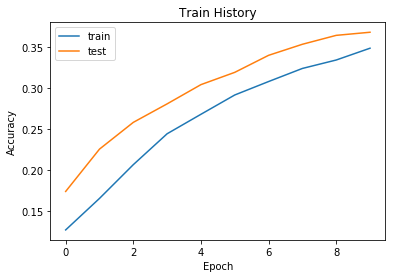

In [25]:
show_train_history('acc','val_acc')

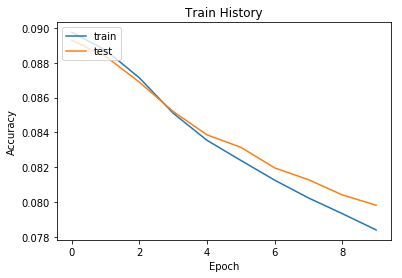

In [26]:
show_train_history('loss','val_loss')

# binary _crossentropy

In [23]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [24]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)   

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 299s 7ms/step - loss: 0.3099 - acc: 0.9001 - val_loss: 0.2971 - val_acc: 0.9000
Epoch 2/10
40000/40000 [==============================] - 313s 8ms/step - loss: 0.2850 - acc: 0.9009 - val_loss: 0.2828 - val_acc: 0.9003
Epoch 3/10
40000/40000 [==============================] - 324s 8ms/step - loss: 0.2700 - acc: 0.9026 - val_loss: 0.2704 - val_acc: 0.9006
Epoch 4/10
40000/40000 [==============================] - 319s 8ms/step - loss: 0.2563 - acc: 0.9049 - val_loss: 0.2584 - val_acc: 0.9015
Epoch 5/10
40000/40000 [==============================] - 305s 8ms/step - loss: 0.2462 - acc: 0.9071 - val_loss: 0.2496 - val_acc: 0.9028
Epoch 6/10
40000/40000 [==============================] - 274s 7ms/step - loss: 0.2384 - acc: 0.9090 - val_loss: 0.2433 - val_acc: 0.9044
Epoch 7/10
40000/40000 [==============================] - 319s 8ms/step - loss: 0.2312 - acc: 0.9109 - val_loss: 0.2375 - 

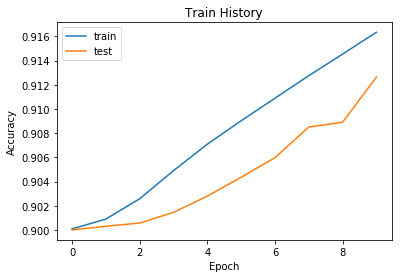

In [27]:
show_train_history('acc','val_acc')

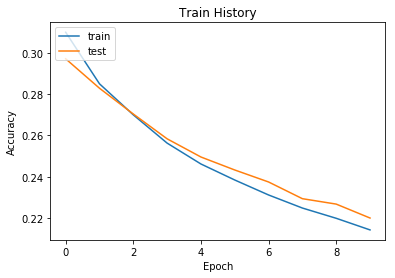

In [28]:
show_train_history('loss','val_loss')

## 使用binary的效果比MSE好上許多